In [1]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from copy import deepcopy
# from diffpy.pdfgui.tui import LoadProject
# from diffpy.pdfgui.control.pdfguicontrol import PDFGuiControl
# from diffpy.pdffit2.pdffit2 import calculationError

from IPython.display import clear_output
# from tqdm.auto import tqdm
import time
import shutil
import yaml

In [2]:
%matplotlib widget

In [3]:
def tqdm_sleep_sec(t, message='Sleep'):
    import datetime
    from tqdm import tqdm
    now = datetime.datetime.now()
    print(f'\nSleep for a while: {t} seconds.')
    print(f'Waiting starts at {now}')
    for i in tqdm(range(0,100), desc=message):
        time.sleep(t/100)

## Copy targeted iq data into a new folder

In [4]:
source_path = '/Users/cheng-hunglin/Documents/Data_LDRD/Ghose_316490_d49d3e59'
iqfolder_path = os.path.join(source_path, 'Cs**')
iqfolder_list = glob.glob(iqfolder_path)
len(iqfolder_list)

95

In [5]:
iqgr_folder = os.path.join(source_path, 'iqgr')
os.makedirs(iqgr_folder, exist_ok=True)

In [6]:
for i in range(len(iqfolder_list)):
    q_chi_path = os.path.join(iqfolder_list[i], 'integration', '**_q.chi')
    q_chi_list = glob.glob(q_chi_path)
    q_chi_list.sort()
    print(f'\nFound {len(q_chi_list)} chi file in {os.path.basename(iqfolder_list[i])}')
    print(*q_chi_list, sep = '\n')

    try:
        shutil.copy2(q_chi_list[-1], iqgr_folder)
        print(f'Copy {os.path.basename(q_chi_list[-1])} to iqgr folder\n')
    except IndexError:
        print(f'**** Copy to iqgr folder failed ****\n')



Found 1 chi file in Cs_032_Br_059_Pb_079_OLA_023_PF_016_Tol_967
/Users/cheng-hunglin/Documents/Data_LDRD/Ghose_316490_d49d3e59/Cs_032_Br_059_Pb_079_OLA_023_PF_016_Tol_967/integration/Cs_032_Br_059_Pb_079_OLA_023_PF_016_Tol_967_20250607-231051_620d4e_scattering-1_mean_q.chi
Copy Cs_032_Br_059_Pb_079_OLA_023_PF_016_Tol_967_20250607-231051_620d4e_scattering-1_mean_q.chi to iqgr folder


Found 1 chi file in Cs_000_Br_040_Pb_063_OLA_021_PF_010_Tol_620
/Users/cheng-hunglin/Documents/Data_LDRD/Ghose_316490_d49d3e59/Cs_000_Br_040_Pb_063_OLA_021_PF_010_Tol_620/integration/Cs_000_Br_040_Pb_063_OLA_021_PF_010_Tol_620_20250608-193204_9d3865_scattering-1_mean_q.chi
Copy Cs_000_Br_040_Pb_063_OLA_021_PF_010_Tol_620_20250608-193204_9d3865_scattering-1_mean_q.chi to iqgr folder


Found 1 chi file in Cs_015_Br_070_Pb_016_OLA_005_PF_009_Tol_530
/Users/cheng-hunglin/Documents/Data_LDRD/Ghose_316490_d49d3e59/Cs_015_Br_070_Pb_016_OLA_005_PF_009_Tol_530/integration/Cs_015_Br_070_Pb_016_OLA_005_PF_009_Tol_53

## Plot average bkg files and save as chi files

In [7]:
bkg_folder_path = os.path.join(source_path, 'Tol_OA**')
bkg_folder_list = glob.glob(bkg_folder_path)
bkg_folder_list.sort()
for i in range(len(bkg_folder_list)):
    print(os.path.basename(bkg_folder_list[i]), '\n')


Tol_OA_bkg_flow_10min 

Tol_OA_bkg_flow_day3 

Tol_OA_bkg_flow_day3_checkInt 

Tol_OA_bkg_flow_day4 



In [8]:
bkg_folder_list

['/Users/cheng-hunglin/Documents/Data_LDRD/Ghose_316490_d49d3e59/Tol_OA_bkg_flow_10min',
 '/Users/cheng-hunglin/Documents/Data_LDRD/Ghose_316490_d49d3e59/Tol_OA_bkg_flow_day3',
 '/Users/cheng-hunglin/Documents/Data_LDRD/Ghose_316490_d49d3e59/Tol_OA_bkg_flow_day3_checkInt',
 '/Users/cheng-hunglin/Documents/Data_LDRD/Ghose_316490_d49d3e59/Tol_OA_bkg_flow_day4']

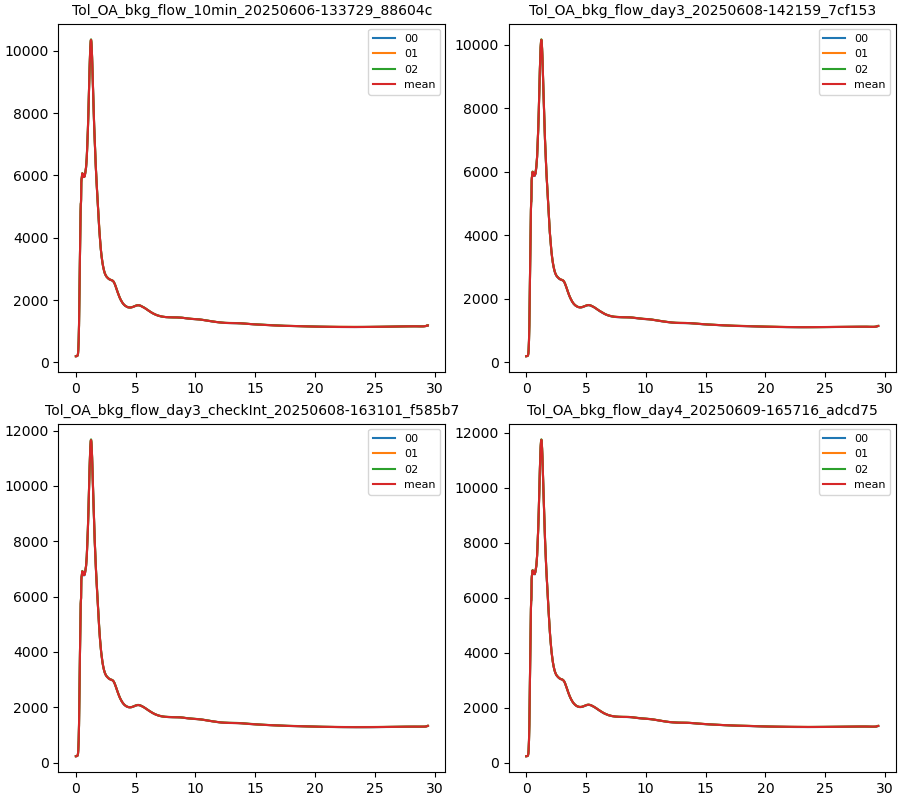

In [9]:
rows = 2
cols = 2
f1, ax1 = plt.subplots(rows, cols, figsize = (9, 8), constrained_layout=True)
idx_array = np.arange(rows*cols).reshape(rows, cols)
legend_properties = {'weight':'regular', 'size':8}

time_stamp = []
for i in range(len(bkg_folder_list)):

    ## read chi in bkg_folder_list[i]
    bkg_chi_path = os.path.join(bkg_folder_list[i], 'integration', '**_q.chi')
    bkg_chi_list = glob.glob(bkg_chi_path)
    bkg_chi_list.sort()

    df_00 = pd.DataFrame()
    j = 0
    for bkg_chi in bkg_chi_list[-3:]:
        df_01 = pd.read_csv(bkg_chi, sep=' ', skiprows=1, names=['Q', 'I'])
        df_00[f'I_{j:02d}'] = df_01['I']
        fn_prefix = os.path.basename(bkg_chi[:-21])

        ## plot data individually
        idx_ax = np.argwhere(idx_array==i)
        ax1[idx_ax[0][0], idx_ax[0][1]].plot(df_01['Q'], df_01['I'], label=f'{j:02d}')
        ax1[idx_ax[0][0], idx_ax[0][1]].legend(prop=legend_properties)
        j += 1

    ## calculate average by pandas
    df_02 = pd.DataFrame()
    df_02['Q'] = df_01['Q']
    df_02['I_mean'] = df_00.mean(axis=1)

    ## plot average data and add title
    ax1[idx_ax[0][0], idx_ax[0][1]].set_title(fn_prefix, fontdict={'fontsize':10})
    ax1[idx_ax[0][0], idx_ax[0][1]].plot(df_02['Q'], df_02['I_mean'], label=f'mean')
    ax1[idx_ax[0][0], idx_ax[0][1]].legend(prop=legend_properties)

    ## get readable_time from metadata
    yaml_path = glob.glob(os.path.join(bkg_folder_list[i], 'meta', f'**{fn_prefix}**.yaml'))[-1]
    with open(yaml_path, 'r') as file:
        metadata = yaml.safe_load(file)
    time_stamp.append(metadata['readable_time'])
    file.close()

    ## save average bkg as chi files
    bkg_mean_fn = os.path.join(bkg_folder_list[i], f'{fn_prefix}_mean.chi')
    df_02.to_csv(bkg_mean_fn, sep=' ', index=False, float_format='{:.8e}'.format)



In [10]:
bkg_chi_list[-3:]

['/Users/cheng-hunglin/Documents/Data_LDRD/Ghose_316490_d49d3e59/Tol_OA_bkg_flow_day4/integration/Tol_OA_bkg_flow_day4_20250609-165716_adcd75_primary-1_mean_q.chi',
 '/Users/cheng-hunglin/Documents/Data_LDRD/Ghose_316490_d49d3e59/Tol_OA_bkg_flow_day4/integration/Tol_OA_bkg_flow_day4_20250609-165716_adcd75_primary-2_mean_q.chi',
 '/Users/cheng-hunglin/Documents/Data_LDRD/Ghose_316490_d49d3e59/Tol_OA_bkg_flow_day4/integration/Tol_OA_bkg_flow_day4_20250609-165716_adcd75_primary-3_mean_q.chi']

In [11]:
fn_prefix

'Tol_OA_bkg_flow_day4_20250609-165716_adcd75'

### Remove undersired bkg from the list

In [12]:
bkg_folder_list.pop(1)
time_stamp.pop(1)

'20250608-142159'

In [13]:
bkg_folder_list

['/Users/cheng-hunglin/Documents/Data_LDRD/Ghose_316490_d49d3e59/Tol_OA_bkg_flow_10min',
 '/Users/cheng-hunglin/Documents/Data_LDRD/Ghose_316490_d49d3e59/Tol_OA_bkg_flow_day3_checkInt',
 '/Users/cheng-hunglin/Documents/Data_LDRD/Ghose_316490_d49d3e59/Tol_OA_bkg_flow_day4']

In [14]:
time_stamp

['20250606-133729', '20250608-163101', '20250609-165716']

## Make subfolders to resort iq data

In [15]:
iqgr_folder

'/Users/cheng-hunglin/Documents/Data_LDRD/Ghose_316490_d49d3e59/iqgr'

In [16]:
sort_bkg = ['bkg_10min', 'bkg_day3', 'bkg_day4']

In [17]:
for sub_folder in sort_bkg:
    os.makedirs(os.path.join(iqgr_folder, sub_folder), exist_ok=True)

## Resort the iq data accroding to time stamp